# Super resolution

Project implementing super resolution for scanned images to be used in text extraction applications such as Tesseract 4.

Project running on:
![Google Cloud](logo-google-cloud-1x.png)

# Idea

![Super Resolution](super_resolution.png)

# Setup

Read libraries and functions

In [1]:
# Plots displayed inline in notebook
%matplotlib inline

# Make help libraries available
import sys
sys.path.append('/home/anlaursen/projects')
sys.path.append('../')

In [2]:
from PIL import Image
from keras.models import load_model
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Custom models
from super_resolution.address_generator import AddressGenerator
from super_resolution.super_resolution import SuperResolution
from image_augmentation.image_augmentation import Augmentor

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
PATH = '../'

## Data generation

Test data generation

In [4]:
# Construct
addr = AddressGenerator(companies_path = PATH + '/data/company_list.pkl',
                        addresses_path = PATH + '/data/address_list.pkl',
                        logos_path = PATH + '/data/logos.pkl')

# Generate
addr.generate_header(1)

img_hr = Image.fromarray(addr.headers_hr[0])
img_lr = Image.fromarray(addr.headers_lr[0])

High resolution target image

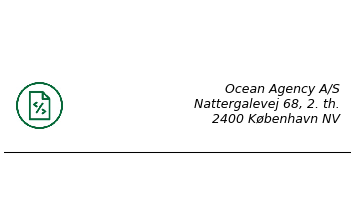

In [5]:
img_hr

Low resolution input image

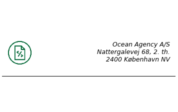

In [6]:
img_lr

## Image augmentation

Do augmentation

In [7]:
# Construct
augmentor = Augmentor(rotation_range = 20,
                      shear_range = 0,
                      shift_range = 0,
                      gaussian_blur_sd = 0,
                      gauss_noise_sd = 0,
                      salt_and_pepper_noise_intensity = 0,
                      rgb_color_shift = 0)

# Generate
augmented_images = augmentor.augment(addr.headers_hr)

# Visualize
img_rotation = Image.fromarray(augmented_images[0])

# Construct
augmentor = Augmentor(rotation_range = 0,
                      shear_range = 2.5,
                      shift_range = 0,
                      gaussian_blur_sd = 0,
                      gauss_noise_sd = 0,
                      salt_and_pepper_noise_intensity = 0,
                      rgb_color_shift = 0)

# Generate
augmented_images = augmentor.augment(addr.headers_hr)

# Visualize
img_shear = Image.fromarray(augmented_images[0])

# Construct
augmentor = Augmentor(rotation_range = 0,
                      shear_range = 0,
                      shift_range = 30,
                      gaussian_blur_sd = 0,
                      gauss_noise_sd = 0,
                      salt_and_pepper_noise_intensity = 0,
                      rgb_color_shift = 0)

# Generate
augmented_images = augmentor.augment(addr.headers_hr)

# Visualize
img_shift = Image.fromarray(augmented_images[0])

# Construct
augmentor = Augmentor(rotation_range = 0,
                      shear_range = 0,
                      shift_range = 0,
                      gaussian_blur_sd = 3,
                      gauss_noise_sd = 0,
                      salt_and_pepper_noise_intensity = 0,
                      rgb_color_shift = 0)

# Generate
augmented_images = augmentor.augment(addr.headers_hr)

# Visualize
img_blur = Image.fromarray(augmented_images[0])

# Construct
augmentor = Augmentor(rotation_range = 0,
                      shear_range = 0,
                      shift_range = 0,
                      gaussian_blur_sd = 0,
                      gauss_noise_sd = 30,
                      salt_and_pepper_noise_intensity = 0,
                      rgb_color_shift = 0)

# Generate
augmented_images = augmentor.augment(addr.headers_hr)

# Visualize
img_gauss_noise = Image.fromarray(augmented_images[0])

# Construct
augmentor = Augmentor(rotation_range = 0,
                      shear_range = 0,
                      shift_range = 0,
                      gaussian_blur_sd = 0,
                      gauss_noise_sd = 0,
                      salt_and_pepper_noise_intensity = 0.01,
                      rgb_color_shift = 0)

# Generate
augmented_images = augmentor.augment(addr.headers_hr)

# Visualize
img_salt_pepper_noise = Image.fromarray(augmented_images[0])

# Construct
augmentor = Augmentor(rotation_range = 0,
                      shear_range = 0,
                      shift_range = 0,
                      gaussian_blur_sd = 0,
                      gauss_noise_sd = 0,
                      salt_and_pepper_noise_intensity = 0,
                      rgb_color_shift = 30)

# Generate
augmented_images = augmentor.augment(addr.headers_hr)

# Visualize
img_white_balance = Image.fromarray(augmented_images[0])

## Image augmentation visualised

Rotate

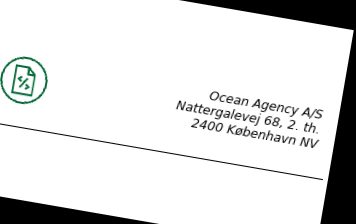

In [8]:
img_rotation

Shear

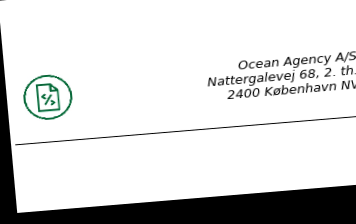

In [9]:
img_shear

Shift

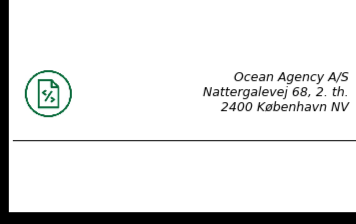

In [10]:
img_shift

Blur

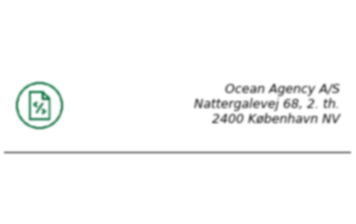

In [11]:
img_blur

Gaussian noise

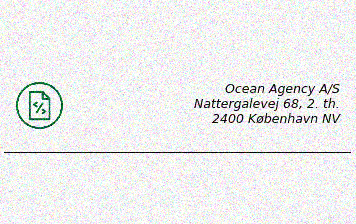

In [12]:
img_gauss_noise

Salt and pepper noise

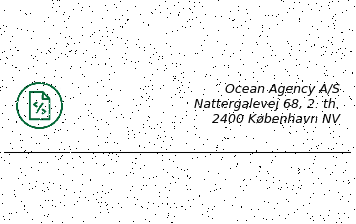

In [13]:
img_salt_pepper_noise

White balance

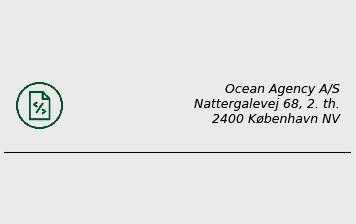

In [14]:
img_white_balance

# Super resolution

## Data generation

Construct super resolution model. Start by generating data

In [ ]:
# Construct
addr = AddressGenerator(companies_path = PATH + '/data/company_list.pkl',
                        addresses_path = PATH + '/data/address_list.pkl',
                        logos_path = PATH + '/data/logos.pkl')

# Generate
addr.generate_header(25000)

np.save(PATH + '/data/random_headers_hr.npy', addr.headers_hr)
np.save(PATH + '/data/random_headers_lr.npy', addr.headers_lr)
    
# Visualize
Image.fromarray(addr.headers_hr[0])

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Tahoma'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Load images

In [15]:
headers_lr = np.load(PATH + '/data/random_headers_lr.npy')

In [16]:
headers_hr = np.load(PATH + '/data/random_headers_hr.npy')

Augment images

In [ ]:
# Construct
augmentor = Augmentor(rotation_range = 0,
                      shear_range = 0,
                      shift_range = 0,
                      gaussian_blur_sd = 1,
                      gauss_noise_sd = 15,
                      salt_and_pepper_noise_intensity = 0.0001,
                      rgb_color_shift = 20)

augmented_images = augmentor.augment(headers_lr)

np.save(PATH + '/data/random_headers_lr_augmentation.npy', augmented_images)

Image.fromarray(augmented_images[0])

## Train model

Load augmented images

In [23]:
augmented_images = np.load(PATH + '/data/random_headers_lr_augmentation.npy')

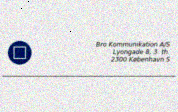

In [24]:
Image.fromarray(augmented_images[0])

Inspect shapes

In [25]:
shape_hr = addr.headers_hr.shape
shape_lr = augmented_images.shape

print(shape_hr)
print(shape_lr)

(1, 224, 356, 3)
(25000, 112, 178, 3)


Initialise model

In [26]:
super_resolution = SuperResolution(shape = shape_hr[1:])

58892288/58889256 [==============================] - 7s 0us/step


Compile model

In [27]:
super_resolution.compile_single_gpu()

Inspect model

In [28]:
super_resolution.m_style.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 15616       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 6 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 6 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

Train model

In [ ]:
super_resolution.fit(augmented_images, headers_hr, batch_size = 16, epochs = 1, learning_rate = 1e-4)

In [ ]:
super_resolution.fit(augmented_images, headers_hr, batch_size = 16, epochs = 1, learning_rate = 1e-4)

In [ ]:
super_resolution.fit(augmented_images, headers_hr, batch_size = 32, epochs = 10, learning_rate = 1e-4)

In [ ]:
super_resolution.fit(augmented_images, headers_hr, batch_size = 32, epochs = 6, learning_rate = 1e-5)

Define super resolution model for prediction

In [29]:
super_resolution.get_top()

Save/load model

In [30]:
super_resolution.top_model.load_weights(PATH + 'results/augmentation_noise_more_images.h5')

In [125]:
super_resolution.top_model.save_weights(PATH + 'results/augmentation_noise_more_images.h5')

In [126]:
super_resolution.top_model.save(PATH + 'results/augmentation_noise_more_images_model.h5')

## Test model

Load data

In [17]:
# High res
#headers_hr = np.load(PATH + '/data/random_headers_hr.npy')

# Low res
#headers_lr = np.load(PATH + '/data/random_headers_lr.npy')

# Augmented
#augmented_images = np.load(PATH + '/data/random_headers_lr_augmentation.npy')

# Get shapes
shape_hr = headers_hr.shape
shape_lr = headers_lr.shape

Create model

In [18]:
# Generate architechture
super_resolution = SuperResolution(shape = shape_hr[1:])

# Compile model
super_resolution.compile_single_gpu()

# Get top model part
super_resolution.get_top()

# Load weights
super_resolution.top_model.load_weights(PATH + 'results/augmentation_noise_more_images.h5')

58892288/58889256 [==============================] - 7s 0us/step


## Examples of scaling

Input image

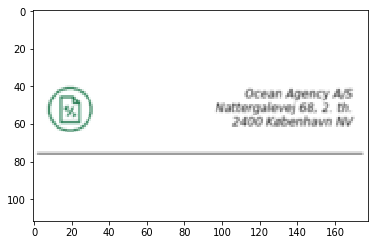

In [19]:
plt.imshow(addr.headers_lr[0])

Extracting text using google Tesseract

In [20]:
img_for_tes_lr = Image.fromarray(addr.headers_lr[0])
pytesseract.image_to_string(img_for_tes_lr, lang='dan')

''

Double the resolution

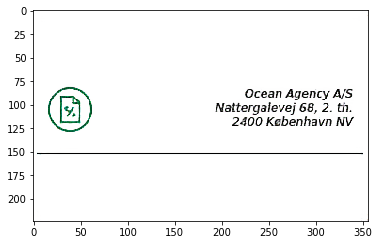

In [21]:
prediction_x2 = super_resolution.top_model.predict(np.expand_dims(np.array(addr.headers_lr[0]), 0))[0]

plt.imshow(prediction_x2.astype('uint8'))

Extracting text using google Tesseract

In [22]:
img_for_tes_x2 = Image.fromarray(prediction_x2.astype('uint8'))
pytesseract.image_to_string(img_for_tes_x2, lang='dan')

'Ocean Agency A/S\nNattergalevej 68, 2. th.\n2400 København NV'

## Increasing the resolution further

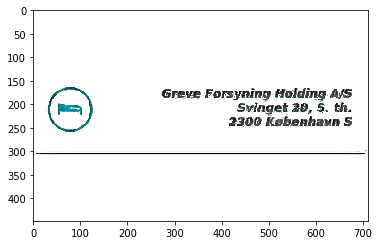

In [69]:
prediction_x4 = super_resolution.top_model.predict(np.expand_dims(prediction_x2, 0))[0]

plt.imshow(prediction_x4.astype('uint8'))

Extract text

In [70]:
img_for_tes_x4 = Image.fromarray(prediction_x4.astype('uint8'))
pytesseract.image_to_string(img_for_tes_x4, lang='dan')

'Greve Forsyning Holding A/S\nSvinget 29, 5. th.\n2300.-København S'